In [1]:
# !pip install opencv-python

# JPEG
##### This notebook is for the purpose of understanding and visualizing each step at the JPEG

### importing the modules and visualization library

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.DCT import DCT
from src.quantizer import Quantizer
from src.huffman import Huffman
from src.ArithCoding import AritCoding
from src.JPEG import JPEG
from src.run_length_code import RunLengthCode
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Reading the orignal image

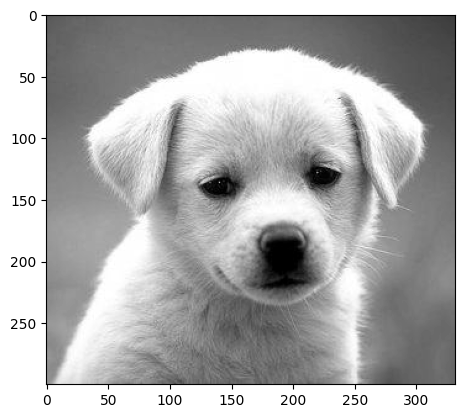

In [4]:
img = cv2.imread("B2DBy.jpg")
# convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# show the orignal image
plt.imshow(img_gray, cmap="gray")

## Low compression

In [5]:
# the default type for the JPEG is low
jpeg = JPEG()                

### Zero Padding
##### Extend the image with zeros to be dividable into 8 by 8 blocks

In [6]:
img_padding = jpeg.zero_padding(img_gray)
print(f"The shape of the image before paddingis: {img_gray.shape}\nThe shape of the image after padding is: {img_padding.shape}")

The shape of the image before paddingis: (300, 332)
The shape of the image after padding is: (304, 336)


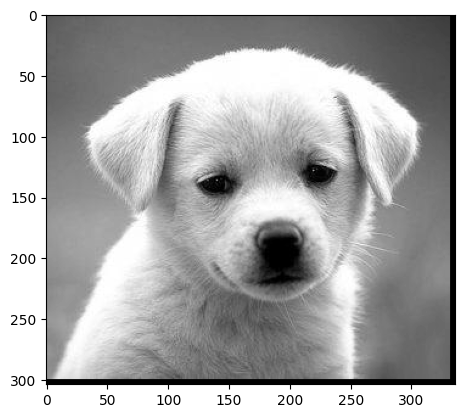

In [7]:
# plot the image after padding
plt.imshow(img_padding, cmap="gray")

### DCT

##### Get and visualize basis of DCT

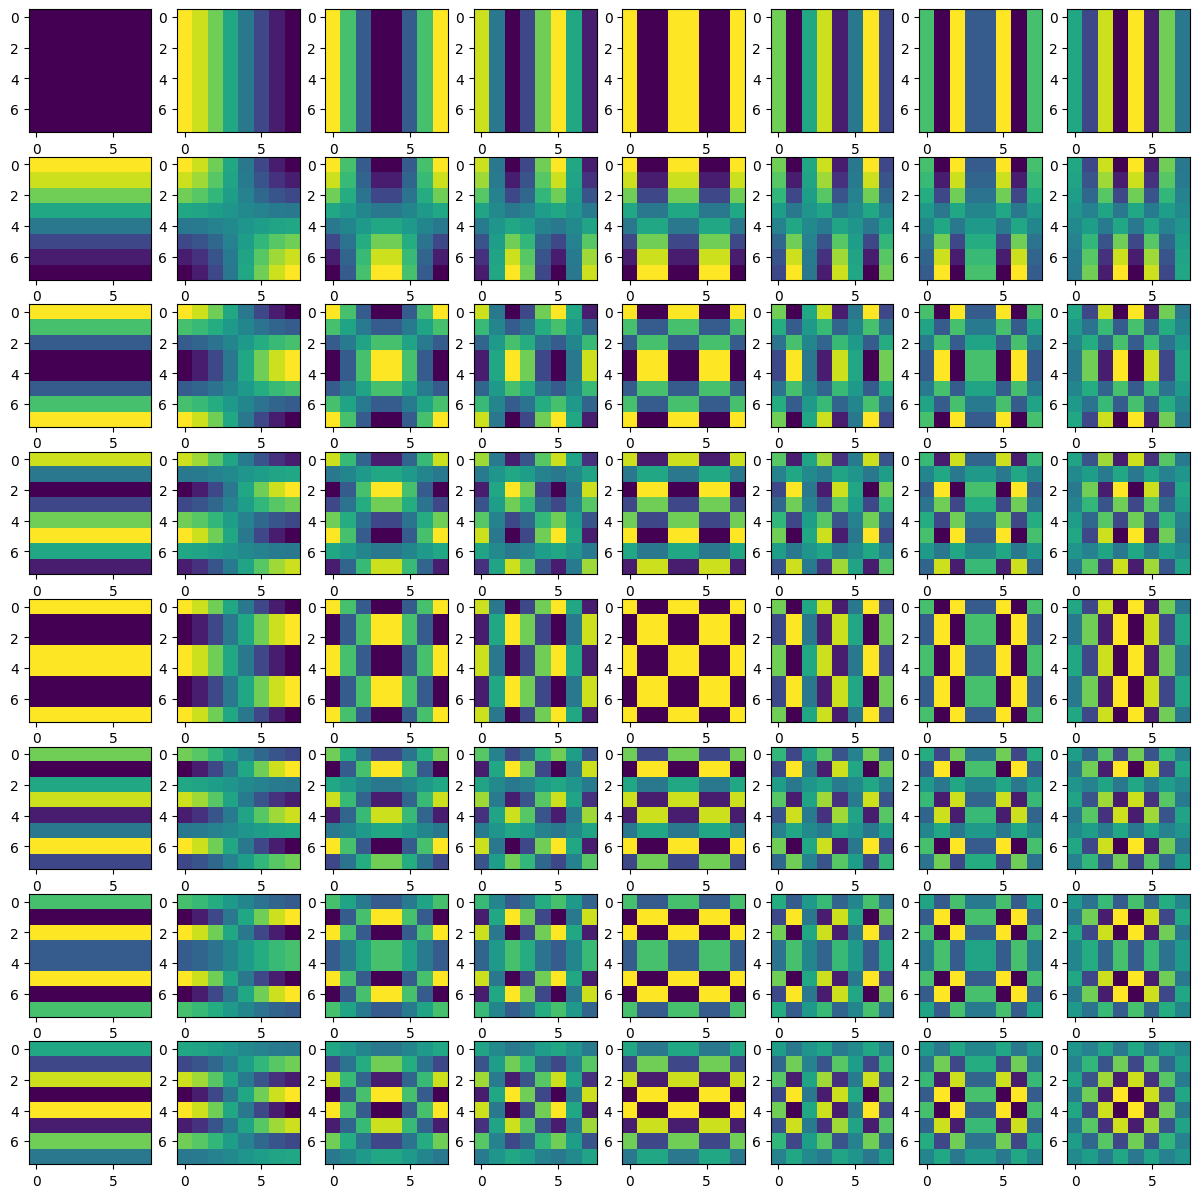

In [8]:
# get the basis of DCT
basis = DCT.get_basis()
# ploting the DCT basis
fig, ax = plt.subplots(8,8, figsize=(15,15))
for i in range(8):
    for j in range(8):
        ax[i, j].imshow(basis[i][j])
plt.show()

##### Applying DCT on the image

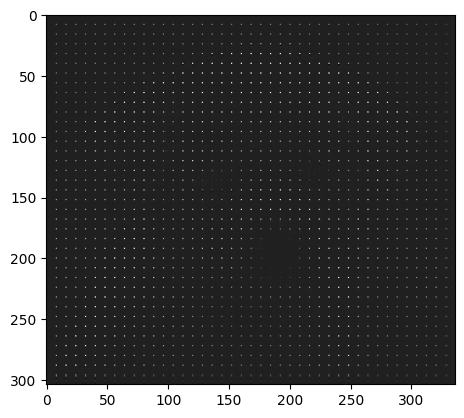

In [9]:
# DCT function divide the image into 8x8 block and multipy each or them by the corresponding basis
img_dct = DCT.DCT(img_padding)

# plot of the output of DCT
plt.imshow(img_dct, cmap="gray")


### Lossy compression (quantization)
##### We have used two types of quantization tables 'Low' and 'High' as given in the book

In [10]:
Low_quantizer  = Quantizer()             # the default type for the Quantizer is low compression
High_quantizer = Quantizer('High')       # the High compresion Quantizer

##### Apply the quantizers on the output of the DCT

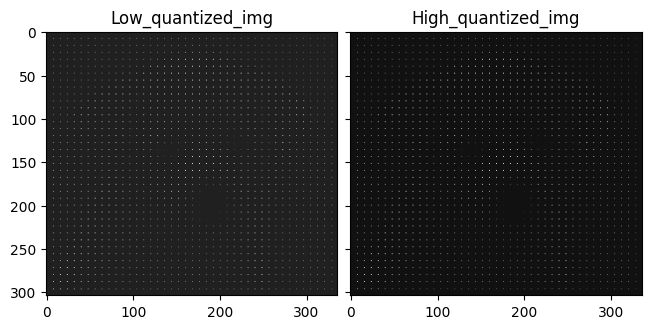

In [11]:
# quantization function divide the image into 8x8 block and multipy each or them by the compression table
Low_quantized_img  = Low_quantizer.quantization(img_dct)
High_quantized_img = High_quantizer.quantization(img_dct)

# plot the image after the quantization
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.set_title('Low_quantized_img')
ax1.imshow(Low_quantized_img, cmap="gray")
ax2.set_title('High_quantized_img')
ax2.imshow(High_quantized_img, cmap="gray")


### Converting the image into a vector and the Run Length Code

In [12]:
# img2vector function divide the image into 8x8 block and convert each of them into a vector in a zigzag way by looping over the sum, then concatenate
vector_Low  = jpeg.img2vector(Low_quantized_img)
vector_High = jpeg.img2vector(High_quantized_img)
print(f"The Low_quantized_img matrix : \n{Low_quantized_img}\nand its vector: {vector_Low}")
print(f"The High_quantized_img matrix : \n{High_quantized_img}\nand its vector: {vector_High}")


The Low_quantized_img matrix : 
[[91  0  0 ...  4  0 -1]
 [-1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [12 -1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [-5  0  0 ...  0  0  0]]
and its vector: [91.  0. -1. ...  0.  0.  0.]
The High_quantized_img matrix : 
[[91  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
and its vector: [91.  0.  0. ...  0.  0.  0.]


In [13]:
# RunLengthCode.encode function loops over the given vector to find zeros, then it counts their number to be set instead of them
run_lenght_code_low  = RunLengthCode.encode(vector_Low)
run_lenght_code_high = RunLengthCode.encode(vector_High)
print(f"The Low_quantized_vector : {vector_Low}\nand its Run Length Code: {run_lenght_code_low}\n")
print(f"The High_quantized_vector : {vector_High}\nand its Run Length Code: {run_lenght_code_high}")


The Low_quantized_vector : [91.  0. -1. ...  0.  0.  0.]
and its Run Length Code: ['91' '0' '1' ... '-2' '0' '21']

The High_quantized_vector : [91.  0.  0. ...  0.  0.  0.]
and its Run Length Code: ['91' '0' '63' ... '-1' '0' '50']


### Huffman Encoder

In [14]:
# initiate Huffman objects for each compression and encode the run_lenght_code symbols into stream of bits
# low compression
Huffman_low  = Huffman(run_lenght_code_low)
Low_code  = Huffman_low.encode(run_lenght_code_low)
# high compression
Huffman_high = Huffman(run_lenght_code_high)
High_code = Huffman_high.encode(run_lenght_code_high)
print(f"The stream of Low_compression : {Low_code}")
print(f"The stream of High_compression : {High_code}")


The stream of Low_compression : 10100001110100001011000001100111111110011101111110001110001100111101110110001110110001110001100111111110100000000110001110001010010100011001100011110011011101110001100001000101010110110100001100101110001100000110011111111001111101011000111000110011111111110001100110001110001100111110100001001111000010110000011001111101000101101000010111000110011111010001011010000101100000110011111010001011010010111000110011111111110001100010111000101001110000011001100011001101110000101110001111011110000010101000111110011011100000010111000110011111100110111000000101100000101101000111100011111111110001100110000001001000101010110101110111111100101110001100111111111100100110001011100011001111111111001001100010111000110011111111110010011000101110001100111111111100100110001011100011001111011101111111011000110000011001111111100111110100001011100100010101011011010001010011000100110010001010101101111101000011100001011100100010101011011010000000111010110000011001111101000101100110

### The compression ratio 
##### Computing the for compression ratio each quantization type

In [15]:
# compression_ratio funtion takes the binary code of the compressed image and original image, return the division of them times 100
Low_ratio = jpeg.compression_ratio(Low_code,img_padding)
High_ratio = jpeg.compression_ratio(High_code,img_padding)
print(f"The compression ratio for Low_compression : {Low_ratio} %")
print(f"The compression ratio for High_compression : {High_ratio} %")

The compression ratio for Low_compression : 20.449907008613938 %
The compression ratio for High_compression : 7.891053249804229 %


### Lossless compression (Huffman Decoder)

In [16]:
# decode the binary stream into the original symbols
# low compression
Low_symbols  = Huffman_low.decode(Low_code)
print(f"The symbols of Low_compression after decoding : {Low_symbols}\nits original symbols that was sent : {run_lenght_code_low}")
print(f"Their equality : {(Low_symbols.astype(str)==run_lenght_code_low).all()}\n")
# high compression
High_symbols = Huffman_high.decode(High_code)
print(f"The symbols of High_compression after decoding : {High_symbols}\nits original symbols that was sent : {run_lenght_code_high}")
print(f"Their equality : {(High_symbols.astype(str)==run_lenght_code_high).all()}")


The symbols of Low_compression after decoding : [91  0  1 ... -2  0 21]
its original symbols that was sent : ['91' '0' '1' ... '-2' '0' '21']
Their equality : True

The symbols of High_compression after decoding : [91  0 63 ... -1  0 50]
its original symbols that was sent : ['91' '0' '63' ... '-1' '0' '50']
Their equality : True


### Reverse of the Run Length Code and Converting back the vector into image 

In [17]:
# reverse the operations that have been done in the Run length code
reverse_run_lenght_code_low  = RunLengthCode.decode(Low_symbols)
reverse_run_lenght_code_high = RunLengthCode.decode(High_symbols)

Text(0.5, 0.98, 'reshaped images after reverse the run length code')

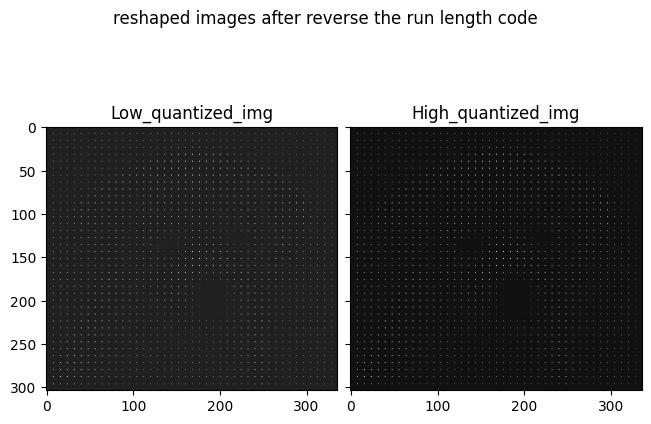

In [18]:
# vector2img does the same as the img2vetor, but the allocation in a the matrix not the vector
reshaped_image_low = jpeg.vector2img(reverse_run_lenght_code_low,img_padding.shape)
reshaped_image_high = jpeg.vector2img(reverse_run_lenght_code_high,img_padding.shape)
# plot the reshaped image
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.set_title('Low_quantized_img')
ax1.imshow(reshaped_image_low, cmap="gray")
ax2.set_title('High_quantized_img')
ax2.imshow(reshaped_image_high, cmap="gray")
fig.suptitle('reshaped images after reverse the run length code')

### Reverse Quantization

Text(0.5, 0.98, 'Reverse Quantization')

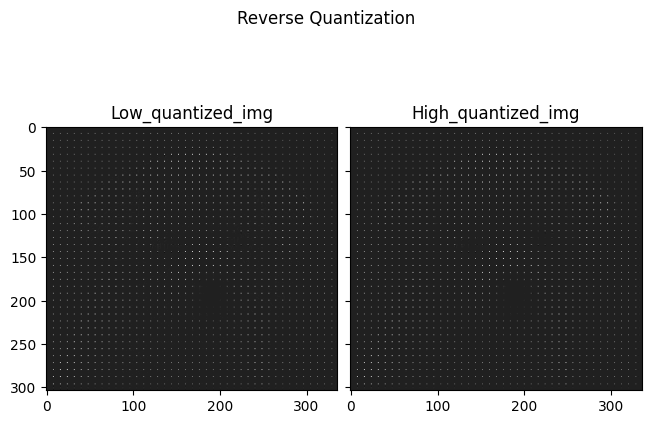

In [19]:
# multiply each 8x8 block by the compression table
reverse_q_low = Low_quantizer.reverse_quantization(reshaped_image_low)
reverse_q_high = High_quantizer.reverse_quantization(reshaped_image_high)
# plot the Reverse Quantization image
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.set_title('Low_quantized_img')
ax1.imshow(reverse_q_low, cmap="gray")
ax2.set_title('High_quantized_img')
ax2.imshow(reverse_q_high, cmap="gray")
fig.suptitle('Reverse Quantization')


### IDCT

Text(0.5, 0.98, 'Restored image with low compression')

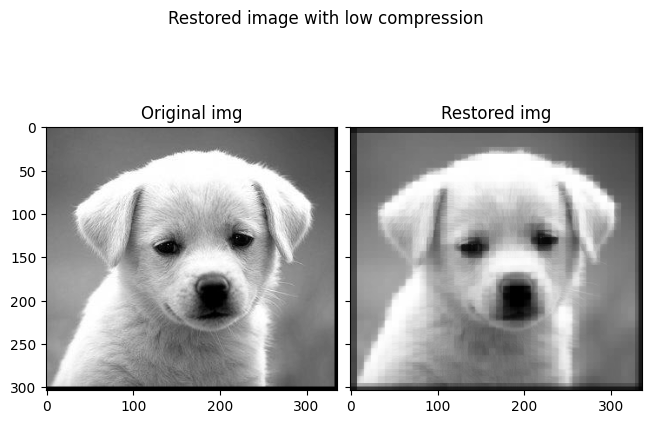

In [20]:
# low compression
IDCT_low = DCT.IDCT(reverse_q_low)

# plot the restored image
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.set_title('Original img')
ax1.imshow(img_padding, cmap="gray")
ax2.set_title('Restored img')
ax2.imshow(IDCT_low, cmap="gray")
fig.suptitle('Restored image with low compression')


Text(0.5, 0.98, 'Restored image with high compression')

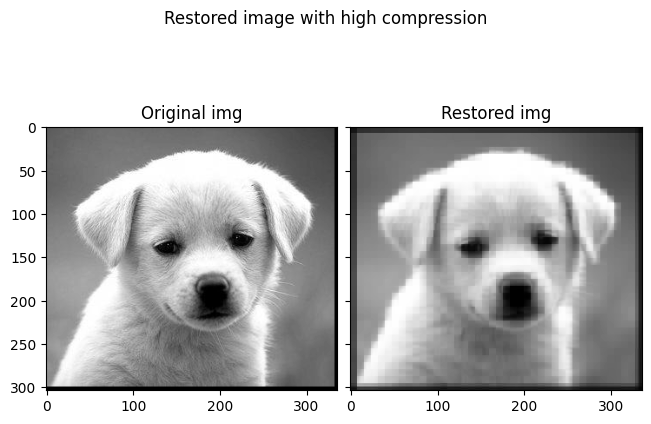

In [21]:
# high compression
IDCT_high = DCT.IDCT(reverse_q_high)

# plot the restored image
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)
ax1.set_title('Original img')
ax1.imshow(img_padding, cmap="gray")
ax2.set_title('Restored img')
ax2.imshow(IDCT_high, cmap="gray")
fig.suptitle('Restored image with high compression')

### Bonus Part: Test Using Arithmetic Coding:

#### AC Encoder

In [22]:
# initiate AC objects for each compression and encode the run_lenght_code symbols into stream of bits
# low compression
eof='/'
run_lenght_code_low_AC = list(run_lenght_code_low.astype(str))+[eof]
run_lenght_code_high_AC = list(run_lenght_code_high.astype(str))+[eof]
AC_low  = AritCoding(run_lenght_code_low_AC)
Low_code_AC  = AC_low.encode(run_lenght_code_low_AC)
# high compression
AC_high = AritCoding(run_lenght_code_high_AC)
High_code_AC = AC_high.encode(run_lenght_code_high_AC)
print(f"The stream of Low_compression : {Low_code_AC}")
print(f"The stream of High_compression : {High_code_AC}")
# list(run_lenght_code_low)


The stream of Low_compression : 11111101010100111011110101111101011010010101011001001010110011001000100000110010011011101001100001110110010011101000010110011111110110010101010000101111110111101100101100001111011111111011101011010110100001111010010100011110100001011001001011011101101011011100010100000011100100010011010101100110010001100101001101100110111001000001110101111010100000000011001101000001110001101001101011111010011100110100000111011110111111110000010101101000110111001110010001110010011100001001011000111110110001101001111101111111010001101100010100000011010101001110110100011000100010001001011001001000001010011001011110110001000011001111001001101010101001011001011011110100000101111011101101011100010101100011110010111110000010011010111101100100001000010110011000001111110000000011011001001100010111111100111010001000000001100000000001011001110101110100110110010110111110101110101110111110010100001101101101000001011001100010100001111000101010101010110110000000000100011100100100011000

#### Compression Ratio

In [23]:
# compression_ratio funtion takes the binary code of the compressed image and original image, return the division of them times 100
Low_ratio_AC = jpeg.compression_ratio(Low_code_AC,img_padding)
High_ratio_AC = jpeg.compression_ratio(High_code_AC,img_padding)
print(f"The compression ratio for Low_compression : {Low_ratio_AC} %")
print(f"The compression ratio for High_compression : {High_ratio_AC} %")

The compression ratio for Low_compression : 20.320086139389193 %
The compression ratio for High_compression : 7.854101409553642 %


#### AC Decoder

In [24]:
# decode the binary stream into the original symbols
# low compression
Low_symbols_AC  = AC_low.decode(Low_code_AC,eof)
print(f"The symbols of Low_compression after decoding : {Low_symbols_AC}\nits original symbols that was sent : {run_lenght_code_low}")
print(f"Their equality : {(Low_symbols_AC==run_lenght_code_low).all()}\n")
# high compression
High_symbols_AC = AC_high.decode(High_code_AC,eof)
print(f"The symbols of High_compression after decoding : {High_symbols_AC}\nits original symbols that was sent : {run_lenght_code_high}")
print(f"Their equality : {(High_symbols_AC==run_lenght_code_high).all()}")


The symbols of Low_compression after decoding : ['91', '0', '1', '-1', '0', '61', '188', '-1', '-2', '0', '61', '197', '-1', '-2', '0', '61', '201', '-1', '-2', '0', '6', '1', '0', '54', '202', '-1', '-1', '1', '0', '60', '208', '-1', '-1', '0', '61', '213', '-1', '-2', '0', '61', '218', '-1', '-2', '0', '61', '220', '0', '1', '-1', '0', '61', '222', '0', '1', '-2', '0', '61', '222', '0', '1', '-1', '0', '61', '222', '1', '-2', '0', '61', '218', '1', '-2', '0', '6', '-1', '0', '54', '216', '1', '-2', '0', '8', '-1', '0', '52', '216', '0', '1', '-2', '0', '61', '216', '0', '1', '-1', '0', '3', '1', '0', '57', '218', '-1', '0', '1', '1', '0', '60', '214', '1', '-2', '0', '61', '212', '0', '1', '-2', '0', '61', '212', '0', '1', '-2', '0', '61', '212', '0', '1', '-2', '0', '61', '212', '0', '1', '-2', '0', '61', '214', '-1', '-1', '0', '61', '213', '0', '1', '-2', '1', '0', '60', '211', '1', '-3', '1', '0', '60', '209', '0', '1', '-2', '1', '0', '60', '206', '1', '-1', '0', '61', '198', '1

#### Huffman VS Arithmetic

In [25]:
print(f"Huffman: The compression ratio for Low_compression :    {Low_ratio} %")
print(f"Arithmetic: The compression ratio for Low_compression : {Low_ratio_AC} %")
print(f"Huffman: The compression ratio for High_compression :    {High_ratio} %")
print(f"Arithmetic: The compression ratio for High_compression : {High_ratio_AC} %")

Huffman: The compression ratio for Low_compression :    20.449907008613938 %
Arithmetic: The compression ratio for Low_compression : 20.320086139389193 %
Huffman: The compression ratio for High_compression :    7.891053249804229 %
Arithmetic: The compression ratio for High_compression : 7.854101409553642 %
